In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Load the dataset
import pandas as pd

# Load the dataset
file_path = '/Users/admin/Desktop/captone/risk-train.txt'
data = pd.read_csv(file_path, sep='\t')  # Change sep if necessary (e.g., ',', ' ' for space)


In [2]:
data.dtypes

ORDER_ID               int64
CLASS                 object
B_EMAIL               object
B_TELEFON             object
B_BIRTHDATE           object
FLAG_LRIDENTISCH      object
FLAG_NEWSLETTER       object
Z_METHODE             object
Z_CARD_ART            object
Z_CARD_VALID         float64
Z_LAST_NAME           object
VALUE_ORDER          float64
WEEKDAY_ORDER         object
TIME_ORDER            object
AMOUNT_ORDER           int64
ANUMMER_01             int64
ANUMMER_02            object
ANUMMER_03            object
ANUMMER_04            object
ANUMMER_05            object
ANUMMER_06            object
ANUMMER_07            object
ANUMMER_08            object
ANUMMER_09            object
ANUMMER_10            object
CHK_LADR              object
CHK_RADR              object
CHK_KTO               object
CHK_CARD              object
CHK_COOKIE            object
CHK_IP                object
FAIL_LPLZ             object
FAIL_LORT             object
FAIL_LPLZORTMATCH     object
FAIL_RPLZ     

In [3]:
data.replace('?', pd.NA, inplace=True) 

In [4]:
data = data.drop(columns=['ANUMMER_03',"ANUMMER_02",'ANUMMER_04',"ANUMMER_05","ANUMMER_06",
                               "ANUMMER_07","ANUMMER_08","ANUMMER_09","ANUMMER_10"])


In [5]:

data["Z_CARD_VALID"] = data["Z_CARD_VALID"].astype(str)
data["Z_CARD_VALID"]= data["Z_CARD_VALID"].str.replace('.', '-', regex=False)
data["Z_CARD_VALID"]= pd.to_datetime(data["Z_CARD_VALID"], format='%m-%Y', errors='coerce')
data["Z_CARD_VALID"] = pd.to_datetime(data["Z_CARD_VALID"])
data["B_BIRTHDATE"] = pd.to_datetime(data["B_BIRTHDATE"], errors='coerce')
data["DATE_LORDER"] = pd.to_datetime(data["DATE_LORDER"], errors='coerce')
data["TIME_ORDER"] = pd.to_datetime(data["TIME_ORDER"], format='%H:%M', errors='coerce')

In [6]:
categorical_columns = [
    'CLASS', 'B_EMAIL', 'B_TELEFON', 'FLAG_LRIDENTISCH', 'FLAG_NEWSLETTER',
    'FAIL_RPLZ', 'FAIL_RPLZORTMATCH', 'FAIL_RORT', 'NEUKUNDE', 'CHK_LADR',
    'CHK_RADR', 'CHK_KTO', 'CHK_CARD', 'CHK_COOKIE', 'CHK_IP', 'FAIL_LPLZ',
    'FAIL_LORT', 'FAIL_LPLZORTMATCH','FAIL_LPLZ','Z_LAST_NAME','Z_METHODE','Z_CARD_ART','WEEKDAY_ORDER',
    'MAHN_AKT','MAHN_HOECHST'
]

In [7]:


import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer

numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data.select_dtypes(include=['object']).columns

# Impute missing numerical values with the mean and categorical values with the mode
data[numerical_cols] = data[numerical_cols].replace({pd.NA: np.nan})
num_imputer = SimpleImputer(strategy='mean')
# Replace pd.NA with np.nan
data[categorical_cols] = data[categorical_cols].replace({pd.NA: np.nan})

# Apply SimpleImputer
cat_imputer = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = cat_imputer.fit_transform(data[categorical_cols])
data.head()

,ORDER_ID,CLASS,B_EMAIL,B_TELEFON,B_BIRTHDATE,FLAG_LRIDENTISCH,FLAG_NEWSLETTER,Z_METHODE,Z_CARD_ART,Z_CARD_VALID,...,FAIL_RPLZ,FAIL_RORT,FAIL_RPLZORTMATCH,SESSION_TIME,NEUKUNDE,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,DATE_LORDER,MAHN_AKT,MAHN_HOECHST
0,49917,no,yes,no,1973-01-17,yes,yes,check,Eurocard,2006-05-01,...,no,no,no,8,yes,0,0.00,NaT,0,0
1,49919,no,yes,yes,1970-12-08,no,no,credit_card,Visa,2007-12-01,...,yes,no,no,13,yes,0,0.00,NaT,0,0
2,49923,no,yes,no,1972-04-03,yes,no,check,Eurocard,2007-12-01,...,no,no,no,3,yes,0,0.00,NaT,0,0
3,49924,no,no,yes,1966-08-01,yes,no,check,Eurocard,2007-01-01,...,no,no,no,11,no,4,75.72,2002-05-12,0,0
4,49927,no,yes,yes,1969-12-21,yes,no,credit_card,Eurocard,2006-12-01,...,no,no,no,16,yes,0,0.00,NaT,0,0


In [8]:
import pandas as pd
data = pd.get_dummies(data, columns=categorical_columns, drop_first=False)
print(data.head(11))


    ORDER_ID B_BIRTHDATE Z_CARD_VALID  VALUE_ORDER          TIME_ORDER  \
0      49917  1973-01-17   2006-05-01        17.80 1900-01-01 09:13:00   
1      49919  1970-12-08   2007-12-01        18.20 1900-01-01 17:36:00   
2      49923  1972-04-03   2007-12-01        10.80 1900-01-01 11:13:00   
3      49924  1966-08-01   2007-01-01        54.50 1900-01-01 02:07:00   
4      49927  1969-12-21   2006-12-01        19.99 1900-01-01 23:46:00   
5      49928  1975-01-20   2007-02-01        22.95 1900-01-01 13:13:00   
6      49929  1978-02-03   2007-11-01         9.80 1900-01-01 14:43:00   
7      49930  1985-07-21   2005-05-01        17.50 1900-01-01 08:51:00   
8      49931  1953-05-21   2007-09-01         9.99 1900-01-01 16:17:00   
9      49933  1978-10-02   2006-11-01        57.80 1900-01-01 16:43:00   
10     49935         NaT   2007-01-01       168.19 1900-01-01 08:25:00   

    AMOUNT_ORDER  ANUMMER_01  SESSION_TIME  AMOUNT_ORDER_PRE  VALUE_ORDER_PRE  \
0              1      406811  

In [9]:
data.dtypes

ORDER_ID                   int64
B_BIRTHDATE       datetime64[ns]
Z_CARD_VALID      datetime64[ns]
VALUE_ORDER              float64
TIME_ORDER        datetime64[ns]
                       ...      
MAHN_AKT_3                  bool
MAHN_HOECHST_0              bool
MAHN_HOECHST_1              bool
MAHN_HOECHST_2              bool
MAHN_HOECHST_3              bool
Length: 74, dtype: object

In [10]:

 
def count_outliers(numerical_cols, column):
    Q1 = numerical_cols[column].quantile(0.25)
    Q3 = numerical_cols[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = numerical_cols[(numerical_cols[column] < lower_bound) | (numerical_cols[column] > upper_bound)]
    return outliers.shape[0]  
 
outlier_counts = {}
 
for col in numerical_cols:
    outlier_count = count_outliers(data, col)
    outlier_counts[col] = outlier_count
 
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

ORDER_ID: 0
VALUE_ORDER: 1356
AMOUNT_ORDER: 1332
ANUMMER_01: 0
SESSION_TIME: 189
AMOUNT_ORDER_PRE: 695
VALUE_ORDER_PRE: 2690


In [11]:
from sklearn.ensemble import IsolationForest

def isolation_forest_outliers(numerical_cols, columns):
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    outlier_preds = iso_forest.fit_predict(numerical_cols[columns])

    # Keep only non-outlier rows (predicted as 1)
    return numerical_cols[outlier_preds == 1]

# Apply Isolation Forest to the dataset
data = isolation_forest_outliers(data, numerical_cols)
data


,ORDER_ID,B_BIRTHDATE,Z_CARD_VALID,VALUE_ORDER,TIME_ORDER,AMOUNT_ORDER,ANUMMER_01,SESSION_TIME,AMOUNT_ORDER_PRE,VALUE_ORDER_PRE,...,WEEKDAY_ORDER_Tuesday,WEEKDAY_ORDER_Wednesday,MAHN_AKT_0,MAHN_AKT_1,MAHN_AKT_2,MAHN_AKT_3,MAHN_HOECHST_0,MAHN_HOECHST_1,MAHN_HOECHST_2,MAHN_HOECHST_3
0,49917,1973-01-17,2006-05-01,17.80,1900-01-01 09:13:00,1,406811,8,0,0.00,...,False,False,True,False,False,False,True,False,False,False
1,49919,1970-12-08,2007-12-01,18.20,1900-01-01 17:36:00,1,600953,13,0,0.00,...,False,True,True,False,False,False,True,False,False,False
2,49923,1972-04-03,2007-12-01,10.80,1900-01-01 11:13:00,1,406310,3,0,0.00,...,False,False,True,False,False,False,True,False,False,False
3,49924,1966-08-01,2007-01-01,54.50,1900-01-01 02:07:00,1,307359,11,4,75.72,...,False,False,True,False,False,False,True,False,False,False
4,49927,1969-12-21,2006-12-01,19.99,1900-01-01 23:46:00,1,200767,16,0,0.00,...,True,False,True,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,49821,1981-03-03,2005-06-01,18.20,1900-01-01 18:21:00,1,406859,10,1,40.83,...,False,False,True,False,False,False,False,False,False,True
29996,49824,1972-02-21,2005-05-01,12.60,1900-01-01 15:51:00,1,206507,10,2,52.84,...,False,False,True,False,False,False,True,False,False,False
29997,49825,1980-06-11,2006-11-01,32.80,1900-01-01 10:37:00,1,500767,6,0,0.00,...,False,False,True,False,False,False,True,False,False,False
29998,49828,1980-12-04,2005-04-01,5.20,1900-01-01 01:52:00,1,502611,6,1,42.92,...,False,False,True,False,False,False,True,False,False,False


In [12]:
from sklearn.ensemble import IsolationForest

def isolation_forest_outliers(data, columns):
    iso_forest = IsolationForest(contamination=0.01, random_state=42)
    outlier_preds = iso_forest.fit_predict(data[columns])

    # Add predictions as a new column named 'is_outlier'
    data = data.copy()  # Avoid modifying the original DataFrame
    data['is_outlier'] = outlier_preds

    return data

# Apply Isolation Forest and store the result
data = isolation_forest_outliers(data, numerical_cols)

# Check if 'is_outlier' column exists
print(data.head())  # Verify the new column is added


   ORDER_ID B_BIRTHDATE Z_CARD_VALID  VALUE_ORDER          TIME_ORDER  \
0     49917  1973-01-17   2006-05-01        17.80 1900-01-01 09:13:00   
1     49919  1970-12-08   2007-12-01        18.20 1900-01-01 17:36:00   
2     49923  1972-04-03   2007-12-01        10.80 1900-01-01 11:13:00   
3     49924  1966-08-01   2007-01-01        54.50 1900-01-01 02:07:00   
4     49927  1969-12-21   2006-12-01        19.99 1900-01-01 23:46:00   

   AMOUNT_ORDER  ANUMMER_01  SESSION_TIME  AMOUNT_ORDER_PRE  VALUE_ORDER_PRE  \
0             1      406811             8                 0             0.00   
1             1      600953            13                 0             0.00   
2             1      406310             3                 0             0.00   
3             1      307359            11                 4            75.72   
4             1      200767            16                 0             0.00   

   ... WEEKDAY_ORDER_Wednesday  MAHN_AKT_0  MAHN_AKT_1  MAHN_AKT_2  \
0  ...    

In [13]:
numerical_cols


Index(['ORDER_ID', 'VALUE_ORDER', 'AMOUNT_ORDER', 'ANUMMER_01', 'SESSION_TIME',
       'AMOUNT_ORDER_PRE', 'VALUE_ORDER_PRE'],
      dtype='object')

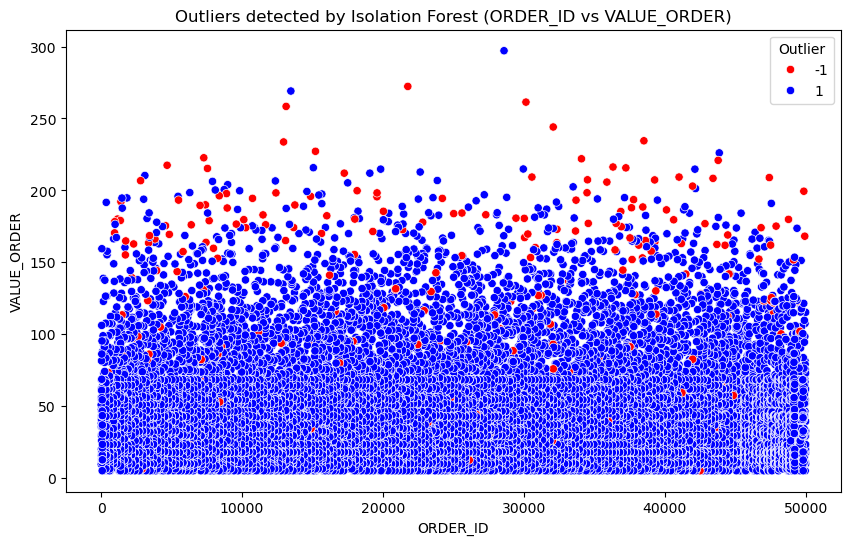

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_outliers(data, x_col, y_col):
    if 'is_outlier' not in data.columns:
        raise ValueError("The 'is_outlier' column is missing from the DataFrame.")

    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, hue='is_outlier', 
                    palette={1: 'blue', -1: 'red'}, legend='full')

    plt.title(f'Outliers detected by Isolation Forest ({x_col} vs {y_col})')
    plt.legend(title='Outlier')
    plt.show()

# Example: Visualize using two numerical columns
plot_outliers(data, 'ORDER_ID', 'VALUE_ORDER')


In [15]:
# Display the first few rows to verify the 'is_outlier' column
print(data.head())

# Count the number of outliers and inliers
outlier_counts = data['is_outlier'].value_counts()
print(f"\nOutlier Counts:\n{outlier_counts}")

# Filter out the detected outliers
outliers = data[data['is_outlier'] == -1]
print(f"\nDetected Outliers:\n{outliers}")

# Optionally, filter inliers (normal data points)
inliers = data[data['is_outlier'] == 1]
print(f"\nInliers:\n{inliers}")


   ORDER_ID B_BIRTHDATE Z_CARD_VALID  VALUE_ORDER          TIME_ORDER  \
0     49917  1973-01-17   2006-05-01        17.80 1900-01-01 09:13:00   
1     49919  1970-12-08   2007-12-01        18.20 1900-01-01 17:36:00   
2     49923  1972-04-03   2007-12-01        10.80 1900-01-01 11:13:00   
3     49924  1966-08-01   2007-01-01        54.50 1900-01-01 02:07:00   
4     49927  1969-12-21   2006-12-01        19.99 1900-01-01 23:46:00   

   AMOUNT_ORDER  ANUMMER_01  SESSION_TIME  AMOUNT_ORDER_PRE  VALUE_ORDER_PRE  \
0             1      406811             8                 0             0.00   
1             1      600953            13                 0             0.00   
2             1      406310             3                 0             0.00   
3             1      307359            11                 4            75.72   
4             1      200767            16                 0             0.00   

   ... WEEKDAY_ORDER_Wednesday  MAHN_AKT_0  MAHN_AKT_1  MAHN_AKT_2  \
0  ...    

In [16]:
corr_matrix = data.corr()

print("Correlation Matrix:")
print(corr_matrix)
import plotly.express as px
import numpy as np
fig = px.imshow(corr_matrix,
                labels=dict(color="Correlation"),
                x=corr_matrix.columns,
                y=corr_matrix.columns,
                color_continuous_scale="RdBu",
                zmin=-1, zmax=1)
fig.update_layout(width=1000, height=800)
 
fig.show()

Correlation Matrix:
                ORDER_ID  B_BIRTHDATE  Z_CARD_VALID  VALUE_ORDER  TIME_ORDER  \
ORDER_ID        1.000000     0.000345      0.004119    -0.006571   -0.002848   
B_BIRTHDATE     0.000345     1.000000      0.000170     0.002241    0.004516   
Z_CARD_VALID    0.004119     0.000170      1.000000     0.012237   -0.009864   
VALUE_ORDER    -0.006571     0.002241      0.012237     1.000000   -0.010282   
TIME_ORDER     -0.002848     0.004516     -0.009864    -0.010282    1.000000   
...                  ...          ...           ...          ...         ...   
MAHN_HOECHST_0  0.000704    -0.002072     -0.006991     0.003028    0.016879   
MAHN_HOECHST_1  0.001368     0.005366      0.004408     0.000608   -0.007283   
MAHN_HOECHST_2 -0.002415     0.001905      0.006992     0.002321   -0.014137   
MAHN_HOECHST_3 -0.001018    -0.009516     -0.001757    -0.014212   -0.008175   
is_outlier      0.005850    -0.004664     -0.000165    -0.220553   -0.002609   

                AMO